<a href="https://colab.research.google.com/github/PV911/Final_Task_PV911/blob/main/Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                       **Название проекта:**
#                     ***Прогноз одобрения кредитной карты***
###Манахов Павел Владимирович

#**Описание проблемы:**
####Кредитные скоринговые карты являются распространенным методом контроля рисков в финансовой индустрии. Они используют личную информацию и данные, представленные заявителями на кредитные карты, для прогнозирования рисков. Банк имеет право решать, выдавать ли кредитную карту заявителю. Кредитные баллы могут количественно оценить величину риска.
#**Задача проекта:**
####По исходным данным спрогнозировать, насколько заёмщик будет в состоянии оплачивать кредитную задолженность по карте, а именно определить статус клиента по его признакам

# **Описание данных:**
### **Датасет состоит из 777 715 записей клиентов.**
###**Входными данными (признаками) являются (всего 19 признаков, в расчет берутся 7):**
ID	(Client number) - идентификационный номер клиента	
####**CODE_GENDER	(Gender) - Пол клиента**
FLAG_OWN_CAR	Is there a car	
####**FLAG_OWN_REALTY - Наличие недвижимости (1 - недвижимость есть)**
CNT_CHILDREN	Number of children	
####**AMT_INCOME_TOTAL (Annual income) - Годовой доход**
####**NAME_INCOME_TYPE	Income category	-  Категория дохода**
NAME_EDUCATION_TYPE	Education level	
NAME_FAMILY_STATUS	Marital status	
NAME_HOUSING_TYPE	Way of living	
####**DAYS_BIRTH	Birthday - Возраст**
####**DAYS_EMPLOYED	 - Количество отработанных дней на текущем месте работы**
FLAG_MOBIL	Is there a mobile phone	
FLAG_WORK_PHONE	Is there a work phone	
FLAG_PHONE	Is there a phone	
FLAG_EMAIL	Is there an email	
OCCUPATION_TYPE	Occupation	
CNT_FAM_MEMBERS	Family size
####**MONTHS_BALANCE - Расчетный месяц (0 - текущий, -1 - предыдущий и т.д.)**

###**Прогнозируемым значением является:**
####**STATUS**
0: 1-29 days past due - 1-29 дней просрочки    
1: 30-59 days past due - 30-59 дней просрочки   
2: 60-89 days overdue - 60-89 дней просрочки   
3: 90-119 days overdue - 90-119 дней просрочки   
4: 120-149 days overdue - 120-149 дней просрочки   
5: Overdue or bad debts, more than 150 days - более 150 дней просрочки   
C: paid off that month - расплатился в этом месяце   
X: No loan for the month - нет кредита на месяц   

* ***Данные взяты из базы Kaggle: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction***


#Имортирование Dataset

In [ ]:
#Имопортируем библиотеки
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
import cv2 # импортируем OpenCV
from matplotlib.image import imread
from google.colab.patches import cv2_imshow
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/application_record.csv', sep=',')
print(df5.shape)
df5.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/credit_record.csv', sep=',')
print(df6.shape)
df6.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# Внутреннее объединение: в получившейся таблице будут содержаться только те сведения, которые есть в обоих таблицах.
df7 = pd.merge(df6, df5, how='inner', on=None)
print(df7.shape)
df7.head(20)

(777715, 20)


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5,5008804,-5,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
6,5008804,-6,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008804,-7,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
8,5008804,-8,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
9,5008804,-9,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [ ]:
df8 = df7.drop(['OCCUPATION_TYPE', 'FLAG_OWN_CAR','NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'CNT_CHILDREN'], axis=1)
print(df8.shape)
df8.head(100)

(777715, 9)


,ID,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,M,Y,427500.0,Working,-12005,-4542,0,C
1,5008804,M,Y,427500.0,Working,-12005,-4542,-1,C
2,5008804,M,Y,427500.0,Working,-12005,-4542,-2,C
3,5008804,M,Y,427500.0,Working,-12005,-4542,-3,C
4,5008804,M,Y,427500.0,Working,-12005,-4542,-4,C
...,...,...,...,...,...,...,...,...,...
95,5008810,F,Y,270000.0,Commercial associate,-19110,-3051,-24,0
96,5008810,F,Y,270000.0,Commercial associate,-19110,-3051,-25,X
97,5008810,F,Y,270000.0,Commercial associate,-19110,-3051,-26,X
98,5008811,F,Y,270000.0,Commercial associate,-19110,-3051,0,C


#**Предобработка данных**

In [ ]:
# Удаление строк с отсутствующими значениями
df10 = df8.dropna()
print(df8.shape)
print(df10.shape)
#df4.isin([5001730]).any()

(777715, 9)
(777715, 9)


In [ ]:
# Приведение данных в цифровой формат
df11 = df10.copy()
#df11["CODE_GENDER"] = np.where(df11["CODE_GENDER"] == "female", 0, 1)
df11.loc[df11["CODE_GENDER"] == 'M', "CODE_GENDER"] = int(1)
df11.loc[df11["CODE_GENDER"] == 'F', "CODE_GENDER"] = int(0)
#df11['NAME_INCOME_TYPE'] = [1 if x == 'Working' else 0 for x in df11['NAME_INCOME_TYPE']]

df11.loc[df11["FLAG_OWN_REALTY"] == 'Y', "FLAG_OWN_REALTY"] = 1
df11.loc[df11["FLAG_OWN_REALTY"] == 'N', "FLAG_OWN_REALTY"] = 0

df11.loc[df11["NAME_INCOME_TYPE"] == 'Working', "NAME_INCOME_TYPE"] = 1 # Расбочий
df11.loc[df11["NAME_INCOME_TYPE"] == 'Commercial associate', "NAME_INCOME_TYPE"] = 2 # Коммерческий работник
df11.loc[df11["NAME_INCOME_TYPE"] == 'Pensioner', "NAME_INCOME_TYPE"] = 3 # Пенсионер
df11.loc[df11["NAME_INCOME_TYPE"] == 'Student', "NAME_INCOME_TYPE"] = 4 # Студент
df11.loc[df11["NAME_INCOME_TYPE"] == 'State servant', "NAME_INCOME_TYPE"] = 5 # Чиновник

df11.loc[df11["STATUS"] == 'C', "STATUS"] = int(6) # Кредит оплачен в текущем месяце
df11.loc[df11["STATUS"] == 'X', "STATUS"] = int(7) # Кредит закрыт

df11.head(100)

,ID,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,1,1,427500.0,1,-12005,-4542,0,6
1,5008804,1,1,427500.0,1,-12005,-4542,-1,6
2,5008804,1,1,427500.0,1,-12005,-4542,-2,6
3,5008804,1,1,427500.0,1,-12005,-4542,-3,6
4,5008804,1,1,427500.0,1,-12005,-4542,-4,6
...,...,...,...,...,...,...,...,...,...
95,5008810,0,1,270000.0,2,-19110,-3051,-24,0
96,5008810,0,1,270000.0,2,-19110,-3051,-25,7
97,5008810,0,1,270000.0,2,-19110,-3051,-26,7
98,5008811,0,1,270000.0,2,-19110,-3051,0,6


In [ ]:
# Проверка и корректировка типов данных
df11.dtypes

ID                    int64
CODE_GENDER          object
FLAG_OWN_REALTY      object
AMT_INCOME_TOTAL    float64
NAME_INCOME_TYPE     object
DAYS_BIRTH            int64
DAYS_EMPLOYED         int64
MONTHS_BALANCE        int64
STATUS               object
dtype: object

In [ ]:
df11 = df11.astype({'CODE_GENDER':'int'})
df11 = df11.astype({'FLAG_OWN_REALTY':'int'})
df11 = df11.astype({'NAME_INCOME_TYPE':'int'})
df11 = df11.astype({'STATUS':'int'})

In [ ]:
df11.dtypes

ID                    int64
CODE_GENDER           int64
FLAG_OWN_REALTY       int64
AMT_INCOME_TOTAL    float64
NAME_INCOME_TYPE      int64
DAYS_BIRTH            int64
DAYS_EMPLOYED         int64
MONTHS_BALANCE        int64
STATUS                int64
dtype: object

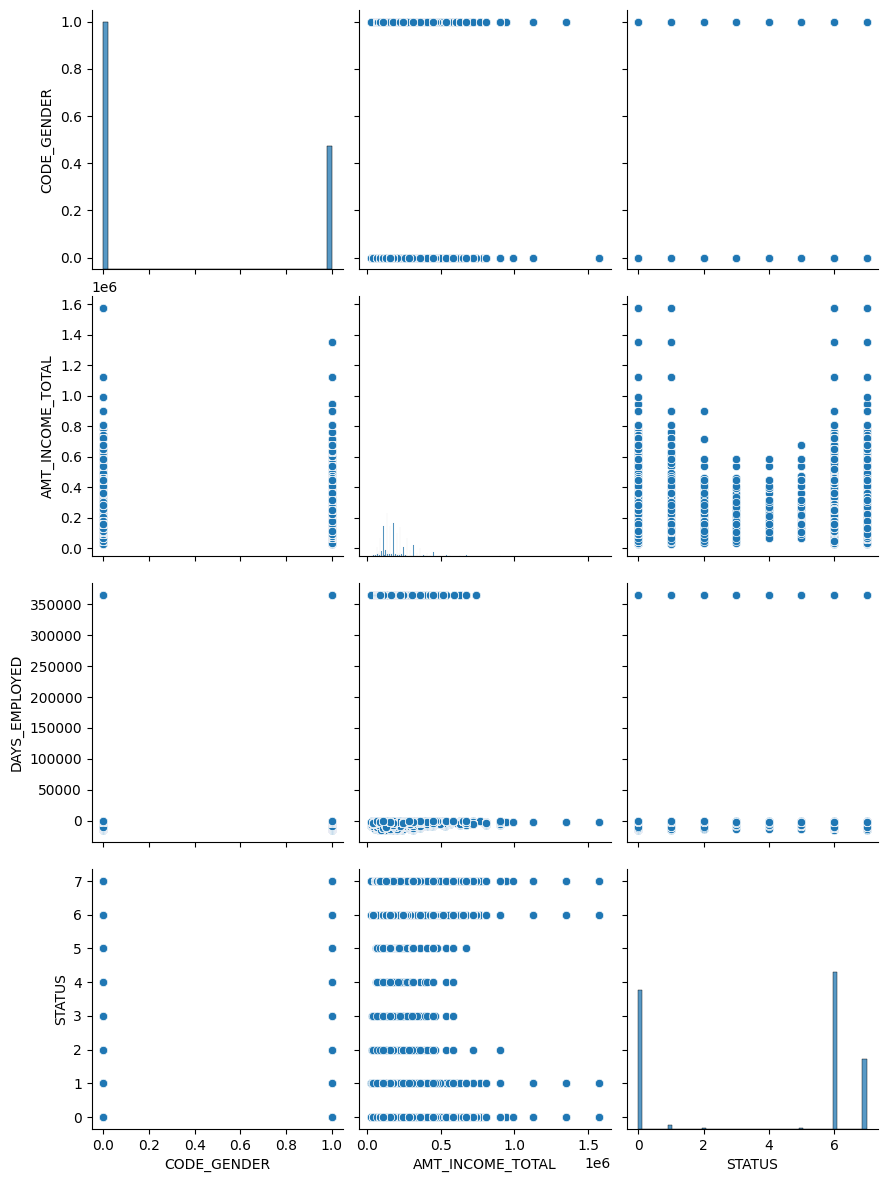

In [ ]:
# Визуализация распределений (графики пар количественных признаков)
sns.pairplot(df11, x_vars=["CODE_GENDER", "AMT_INCOME_TOTAL",  "STATUS"], y_vars=["CODE_GENDER", "AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "STATUS"], height=3)

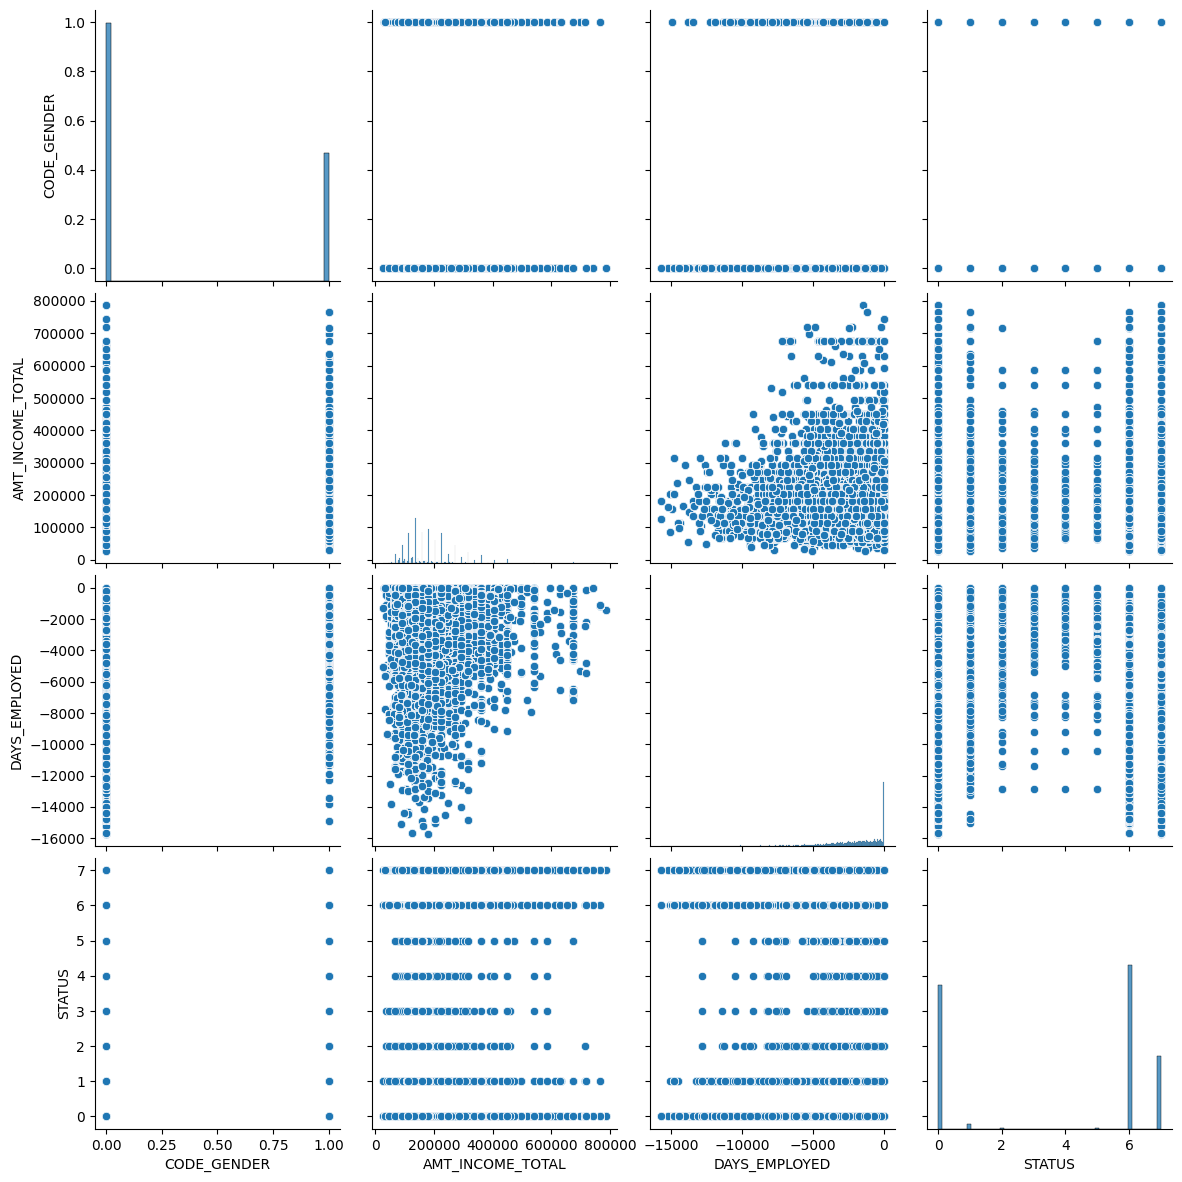

In [ ]:
# Исключение выбросов в данных
df12 = df11[df11['AMT_INCOME_TOTAL'] < int(0.8e6)] # Удаление записей клиентов с годовым доходом больше 800 000
'''for index, row in df10.iterrows():
  if row['DAYS_EMPLOYED'] > 0:
    row['DAYS_EMPLOYED'] = 0
  else:
    pass'''
df12.loc[df12["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = 0 # Удаление записей клиентов с ошибочными данными по периоду занятости
df12.head(100)
sns.pairplot(df12, x_vars=["CODE_GENDER", "AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "STATUS"], y_vars=["CODE_GENDER", "AMT_INCOME_TOTAL", "DAYS_EMPLOYED", "STATUS"], height=3)

                        ID  CODE_GENDER  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
ID                1.000000     0.010420        -0.097183         -0.033197   
CODE_GENDER       0.010420     1.000000        -0.056572          0.204253   
FLAG_OWN_REALTY  -0.097183    -0.056572         1.000000          0.037886   
AMT_INCOME_TOTAL -0.033197     0.204253         0.037886          1.000000   
NAME_INCOME_TYPE -0.017970    -0.140251         0.040721         -0.013315   
DAYS_BIRTH        0.042132     0.204764        -0.131055          0.085072   
DAYS_EMPLOYED     0.006000     0.035329         0.030621         -0.091934   
MONTHS_BALANCE    0.004982     0.013696        -0.009063          0.001714   
STATUS            0.014276     0.006486        -0.002220         -0.010474   

                  NAME_INCOME_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  MONTHS_BALANCE  \
ID                       -0.017970    0.042132       0.006000        0.004982   
CODE_GENDER              -0.140251    0.204764       0.03

<Axes: >

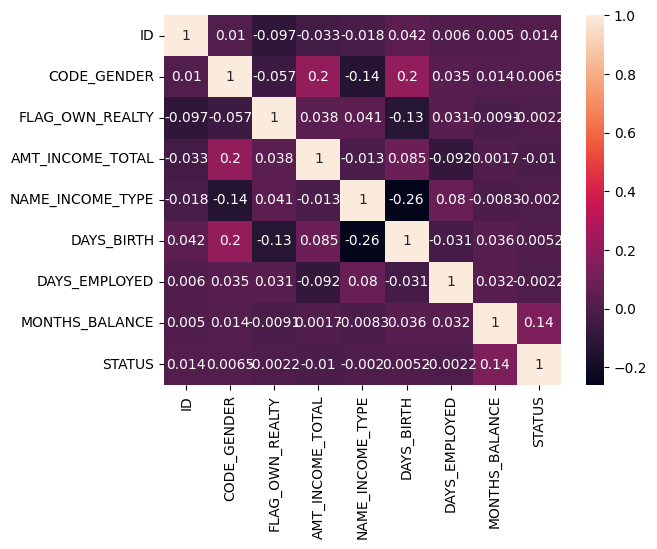

In [ ]:
# Построение корреляционной матрицы
corr_matrix = df12.loc[:,:].corr()
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)

Text(0.5, 1.0, 'STATUS')

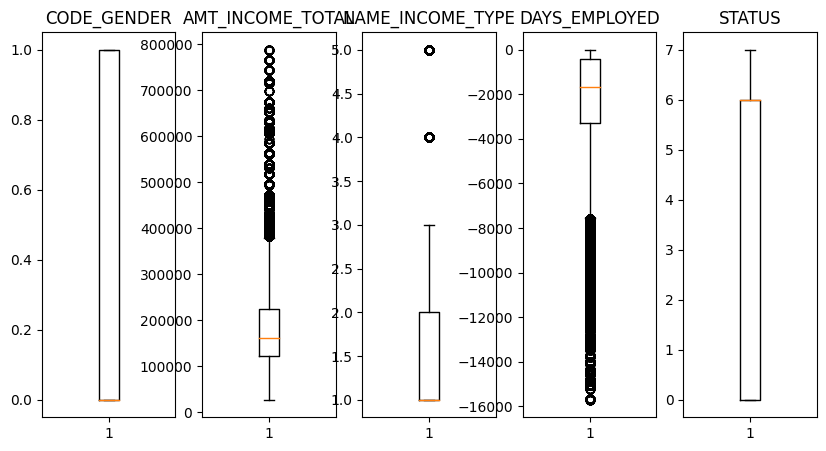

In [ ]:
# Построение "ящика с усами" для проверки данных на выбросы
plt.figure(figsize=(10, 5))
plt.subplot(151)
plt.boxplot(df12.CODE_GENDER)
plt.title("CODE_GENDER")
plt.subplot(152)
plt.boxplot(df12.AMT_INCOME_TOTAL)
plt.title("AMT_INCOME_TOTAL")
plt.subplot(153)
plt.boxplot(df12.NAME_INCOME_TYPE)
plt.title("NAME_INCOME_TYPE")
plt.subplot(154)
plt.boxplot(df12.DAYS_EMPLOYED)
plt.title("DAYS_EMPLOYED")
plt.subplot(155)
plt.boxplot(df12.STATUS)
plt.title("STATUS")

In [ ]:
# Сохранение в csv:
df12.to_csv('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/credit_record_df12.csv')

###Визуализация данных

In [ ]:
df_0 = df12[df12['STATUS'] == 0]
df_1 = df12[df12['STATUS'] == 1]
df_2 = df12[df12['STATUS'] == 2]
df_3 = df12[df12['STATUS'] == 3]
df_4 = df12[df12['STATUS'] == 4]
df_5 = df12[df12['STATUS'] == 5]
df_6 = df12[df12['STATUS'] == 6]
df_7 = df12[df12['STATUS'] == 7]

Text(0, 0.5, 'Годовой доход')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


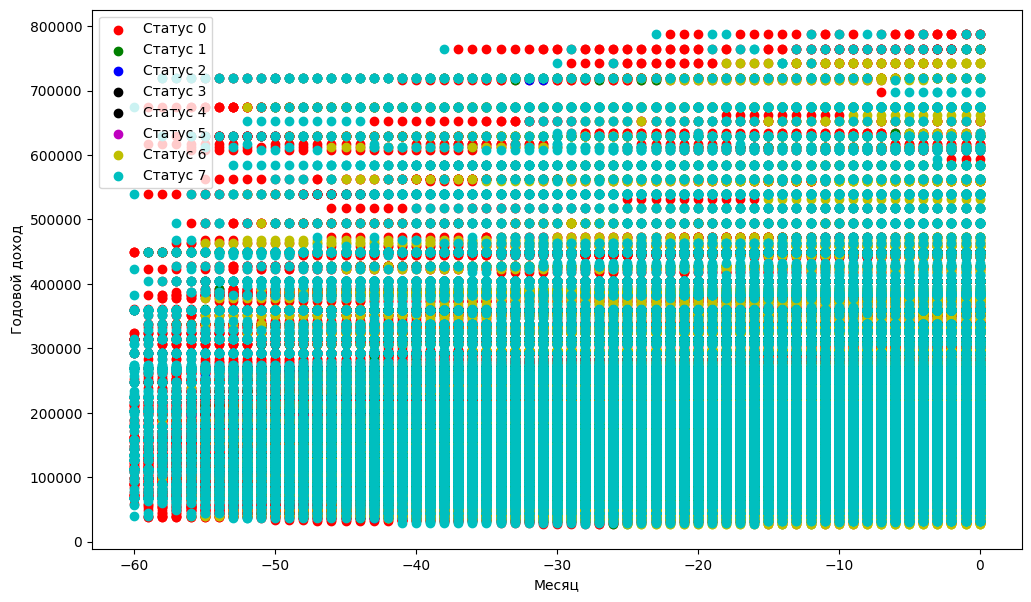

In [ ]:
#'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'MONTHS_BALANCE'
x_vis = 'MONTHS_BALANCE'
y_vis = 'AMT_INCOME_TOTAL'
plt.figure(figsize=(12, 7))
plt.scatter(df_0[x_vis], df_0[y_vis], c='r', label='Статус 0')
plt.scatter(df_1[x_vis], df_1[y_vis], c='g', label='Статус 1')
plt.scatter(df_2[x_vis], df_2[y_vis], c='b', label='Статус 2')
plt.scatter(df_3[x_vis], df_3[y_vis], c='k', label='Статус 3')
plt.scatter(df_4[x_vis], df_4[y_vis], c='k', label='Статус 4')
plt.scatter(df_5[x_vis], df_5[y_vis], c='m', label='Статус 5')
plt.scatter(df_6[x_vis], df_6[y_vis], c='y', label='Статус 6')
plt.scatter(df_7[x_vis], df_7[y_vis], c='c', label='Статус 7')
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Годовой доход')

Text(0, 0.5, 'Возраст')

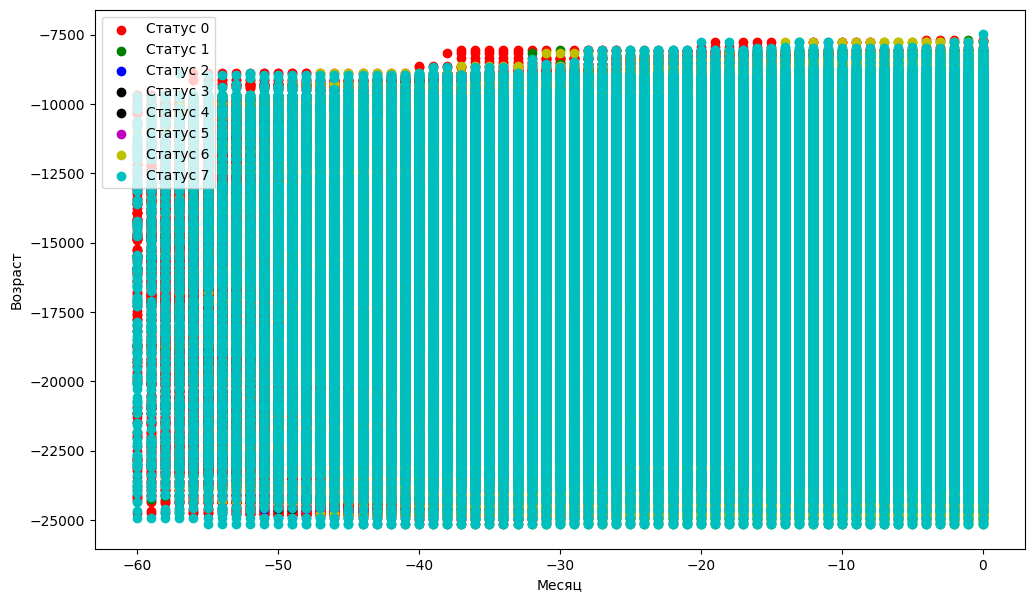

In [ ]:
x_vis = 'MONTHS_BALANCE'
y_vis = 'DAYS_BIRTH'
plt.figure(figsize=(12, 7))
plt.scatter(df_0[x_vis], df_0[y_vis], c='r', label='Статус 0')
plt.scatter(df_1[x_vis], df_1[y_vis], c='g', label='Статус 1')
plt.scatter(df_2[x_vis], df_2[y_vis], c='b', label='Статус 2')
plt.scatter(df_3[x_vis], df_3[y_vis], c='k', label='Статус 3')
plt.scatter(df_4[x_vis], df_4[y_vis], c='k', label='Статус 4')
plt.scatter(df_5[x_vis], df_5[y_vis], c='m', label='Статус 5')
plt.scatter(df_6[x_vis], df_6[y_vis], c='y', label='Статус 6')
plt.scatter(df_7[x_vis], df_7[y_vis], c='c', label='Статус 7')
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Возраст')

Text(0, 0.5, 'Стаж работы')

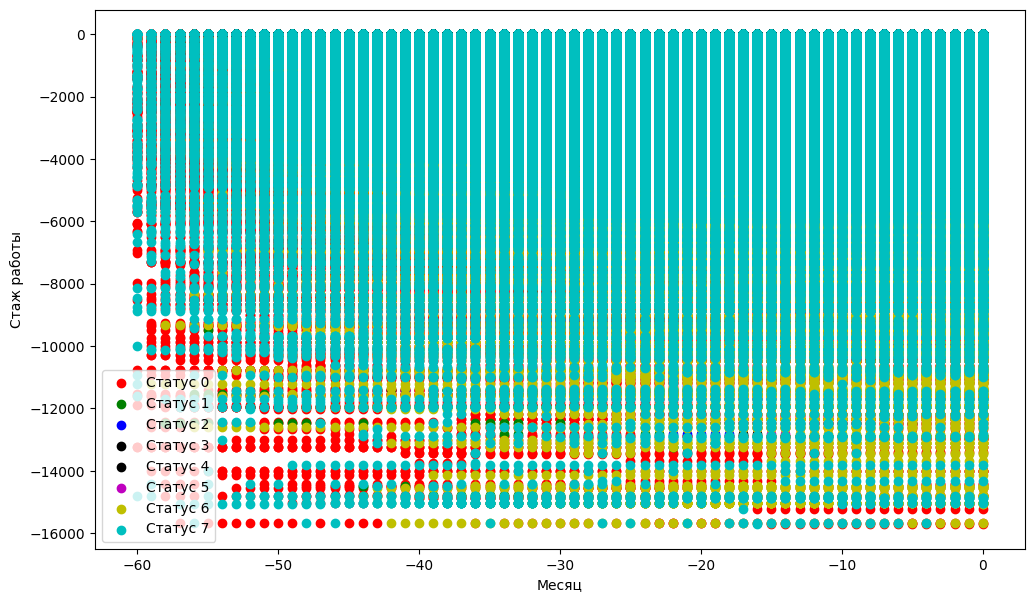

In [ ]:
x_vis = 'MONTHS_BALANCE'
y_vis = 'DAYS_EMPLOYED'
plt.figure(figsize=(12, 7))
plt.scatter(df_0[x_vis], df_0[y_vis], c='r', label='Статус 0')
plt.scatter(df_1[x_vis], df_1[y_vis], c='g', label='Статус 1')
plt.scatter(df_2[x_vis], df_2[y_vis], c='b', label='Статус 2')
plt.scatter(df_3[x_vis], df_3[y_vis], c='k', label='Статус 3')
plt.scatter(df_4[x_vis], df_4[y_vis], c='k', label='Статус 4')
plt.scatter(df_5[x_vis], df_5[y_vis], c='m', label='Статус 5')
plt.scatter(df_6[x_vis], df_6[y_vis], c='y', label='Статус 6')
plt.scatter(df_7[x_vis], df_7[y_vis], c='c', label='Статус 7')
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Стаж работы')

#**Реализация машинного обучения**
##Решается задача классификации, а именно определение статуса клиента по исходным данным в расчетном месяце

In [ ]:
xy = df12.drop(['ID'], axis=1)
#xy.head()
x = xy.iloc[:, :-1]
#x = xy[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'MONTHS_BALANCE']]
y = xy.iloc[:, -1]
x.head()

,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE
0,1,1,427500.0,1,-12005,-4542,0
1,1,1,427500.0,1,-12005,-4542,-1
2,1,1,427500.0,1,-12005,-4542,-2
3,1,1,427500.0,1,-12005,-4542,-3
4,1,1,427500.0,1,-12005,-4542,-4


In [ ]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: STATUS, dtype: int64

##Метод "k-ближайших соседей"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(8)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [ ]:
print(y_test[0:10])
print(pred[0:10])
test = pd.DataFrame()
test['CODE_GENDER'] = [0]
test['FLAG_OWN_REALTY'] = [0]
test['AMT_INCOME_TOTAL'] = [100000]
test['NAME_INCOME_TYPE'] = [1]
test['DAYS_BIRTH'] = [-1200]
test['DAYS_EMPLOYED'] = [-1]
test['MONTHS_BALANCE'] = [-10]
text_out = knn.predict(test)
print(text_out)
#data1 = [[0, 0, 0, 0, 0, 0, 0]]
#data_out = knn.predict(data1)
#print(data_out[0])

70295     6
396351    7
755015    0
772972    7
154435    7
320740    0
6         6
371678    0
71285     6
771664    0
Name: STATUS, dtype: int64
[6 6 0 0 0 0 6 0 6 6]
[0]


In [ ]:
# Сохранение модели:
import pickle
pickle.dump(knn, open('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/model_knn.sav', 'wb'))
pickle.dump(knn, open('model_knn.sav', 'wb'))

###Метрики для оценки работы модели на тестовых данных

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(metrics.classification_report(y_test, pred))

0.6650690270503579
              precision    recall  f1-score   support

           0       0.63      0.70      0.66     57843
           1       0.28      0.07      0.11      1673
           2       0.12      0.01      0.02       153
           3       0.20      0.03      0.05        63
           4       0.20      0.02      0.04        43
           5       0.58      0.48      0.52       311
           6       0.70      0.73      0.72     65854
           7       0.67      0.47      0.55     29289

    accuracy                           0.67    155229
   macro avg       0.42      0.32      0.34    155229
weighted avg       0.66      0.67      0.66    155229



In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average='macro')

0.4223825112921078

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average='macro')

0.31574906729596713

##Метод "Дерево решений"

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
predicton = dt.predict(x_test)

In [ ]:
print(y_test[0:10])
print(predicton[0:10])

70295     6
396351    7
755015    0
772972    7
154435    7
320740    0
6         6
371678    0
71285     6
771664    0
Name: STATUS, dtype: int64
[6 6 0 0 0 0 6 0 6 6]


In [ ]:
'''from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# Экспортируем дерево решений в graphviz
graph = Source(export_graphviz(dt, out_file=None, filled = True))

# Отображаем дерево решений
display(SVG(graph.pipe(format='svg')))'''

###Метрики для оценки работы модели на тестовых данных

In [ ]:
accuracy = accuracy_score(y_test, predicton)
print(accuracy)
print(metrics.classification_report(y_test, predicton))

0.591371457652887
              precision    recall  f1-score   support

           0       0.56      0.63      0.59     57843
           1       0.17      0.15      0.16      1673
           2       0.08      0.07      0.07       153
           3       0.04      0.03      0.03        63
           4       0.03      0.02      0.02        43
           5       0.47      0.41      0.44       311
           6       0.65      0.65      0.65     65854
           7       0.56      0.42      0.48     29289

    accuracy                           0.59    155229
   macro avg       0.32      0.30      0.31    155229
weighted avg       0.59      0.59      0.59    155229



In [ ]:
# Сохранение модели:
import pickle
pickle.dump(dt, open('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/model_dt.sav', 'wb'))

##Нейросеть

In [ ]:
st = StandardScaler()
x_st = st.fit_transform(x)
x_st_df = pd.DataFrame(x_st)
x_st_df.head()

,0,1,2,3,4,5,6
0,1.418884,0.718931,2.544832,-0.755813,1.003661,-0.908409,1.375831
1,1.418884,0.718931,2.544832,-0.755813,1.003661,-0.908409,1.304816
2,1.418884,0.718931,2.544832,-0.755813,1.003661,-0.908409,1.233801
3,1.418884,0.718931,2.544832,-0.755813,1.003661,-0.908409,1.162787
4,1.418884,0.718931,2.544832,-0.755813,1.003661,-0.908409,1.091772


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Создаем модель как объект класса Sequential
model = Sequential()
#Создаем два слоя на входе нейросети и один на выходе
model.add(Dense(8, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_values = to_categorical(y)
print(y_values)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
model.fit(x_st, y_values, epochs=2)

Epoch 1/2
24255/24255 [==============================] - 52s 2ms/step - loss: 1.1123 - accuracy: 0.4695
Epoch 2/2
24255/24255 [==============================] - 53s 2ms/step - loss: 1.0989 - accuracy: 0.4727


In [ ]:
# Сохранение модели:
pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/model_nn.sav', 'wb'))
pickle.dump(model, open('model_nn.sav', 'wb'))
nn_model = pickle.load(open('model_nn.sav', 'rb'))

In [ ]:
test_m = [[0, 0, 10000,1, -10000, -365, 0]]
p = nn_model.predict(test_m)
print(p)
print(np.argmax(p))

1/1 [==============================] - 0s 171ms/step
[[0. 0. 0. 0. 0. 0. 1. 0.]]
6


##Метод опорных векторов

In [ ]:
from sklearn.svm import SVC
clf = SVC()
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, test_size=0.9)
clf.fit(x_train_, y_train_)
#clf.support_vectors_
pr = clf.predict(x_test_[0:1000])

In [ ]:
print(y_test_[0:10])
print(pr[0:10])
test = pd.DataFrame()
test['CODE_GENDER'] = [0]
test['FLAG_OWN_REALTY'] = [0]
test['AMT_INCOME_TOTAL'] = [100000]
test['NAME_INCOME_TYPE'] = [1]
test['DAYS_BIRTH'] = [-1200]
test['DAYS_EMPLOYED'] = [-1]
test['MONTHS_BALANCE'] = [-10]
pr_test = clf.predict(test)
print(pr_test)

728348    6
757785    6
676824    6
159747    0
148683    6
247925    0
469196    0
159188    6
87020     7
32957     0
Name: STATUS, dtype: int64
[6 6 6 6 6 6 6 6 6 6]
[6]


###Метрики для оценки работы модели на тестовых данных

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

ac = accuracy_score(y_test_[0:1000], pr)
print(accuracy)
print(metrics.classification_report(y_test_[0:1000], pr))

0.591371457652887
              precision    recall  f1-score   support

           0       0.47      0.02      0.05       366
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.42      0.98      0.59       420
           7       0.00      0.00      0.00       201

    accuracy                           0.42      1000
   macro avg       0.15      0.17      0.11      1000
weighted avg       0.35      0.42      0.26      1000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_[0:1000], pr, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.14894397052774647

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test_[0:1000], pr, average='macro')


0.1675904241478012

# **Развертывание модели**
Внедрить полученную модель возможно через облачный сервис. Пользователями сервиса могут быть сотрудники банков, принимающие решение о выдаче кредитной карты клиентам

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=dcf19f333a9e8ac305139f6071efae2607f654bd358cb1d619179e7a15861eee
  Stored in directory: /root/.cache/pip/wheels/31/49/9c/44b13823eb256a3b4dff34b972f7a3c7d9910bfef269e59bd7
Successfully built pyngrok


In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<html>
<head>
<style>
body{background-color : lightgreen;
}
</style>
</head>
   <body>
      <form action = "{{ url_for('predict')}}" method = "POST" 
         enctype = "multipart/form-data">
	      <title>Прогноз одобрения кредитной карты</title>
         <div class="form-group  purple-border">
				  <label for="comment">Пол клиента (1 - мужчина; 0 - женщина):</label>
				  <textarea class="form-control" id="query1" name="query1" rows="1" cols="5" autofocus>{{query1}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Наличие недвижимости (1 - недвижимость есть; 0 - недвижимости нет)</label>
				  <textarea class="form-control" id="query2" name="query2" rows="1" cols="5" autofocus>{{query2}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Годовой доход</label>
				  <textarea class="form-control"  id="query3" name="query3" rows="1" cols="5" autofocus>{{query3}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Категория профессии (1 - рабочий; 2 - торговый служащий; 3 - пенсионер; 4 - студент; 5 - госслужащий)</label>
				  <textarea class="form-control" id="query4" name="query4" rows="1" cols="5" autofocus>{{query4}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Возраст (в днях, со знаком "-")</label>
				  <textarea class="form-control" id="query5" name="query5" rows="1" cols="5" autofocus>{{query5}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Количество отработанных дней на текущем месте работы (со знаком "-")</label>
				  <textarea class="form-control" id="query6" name="query6" rows="1" cols="5" autofocus>{{query6}}</textarea>
			</div>
         <div class="form-group  purple-border">
				  <label for="comment">Расчетный месяц (0 - текущий, -1 - предыдущий и т.д.)</label>
				  <textarea class="form-control" id="query7" name="query7" rows="1" cols="5" autofocus>{{query7}}</textarea>
			</div>

			<br>

         <div class="col-sm-3">
			<button type="submit" class="btn btn-primary" name="submit">Прогноз одобрения кредитной карты</button>
			</div>
         <br>
         <textarea class="form-control" id="comment" name="query10" rows="2" cols="50" autofocus>{{output1}}</textarea>
      </form>   
   </body>
</html>

Writing templates/index.html


In [ ]:
from flask import Flask, render_template # сам Flask
from flask_ngrok import run_with_ngrok # функция для доступа к приложению из сети
from pyngrok import ngrok
ngrok.set_auth_token('2NuVa1ZkCWLKfDdkZOBcI7T3p64_7vLiFv6v4PzUV9Wz2KwFW')

In [ ]:
from flask import Flask, request, render_template
app = Flask(__name__, template_folder='/content/templates')
run_with_ngrok(app)
q = ""

@app.route("/")
def loadPage():
  return render_template('index.html', query="")


@app.route("/predict", methods=['POST'])
def predict():
  inputQuery1 = request.form['query1']
  inputQuery2 = request.form['query2']
  inputQuery3 = request.form['query3']
  inputQuery4 = request.form['query4']
  inputQuery5 = request.form['query5']
  inputQuery6 = request.form['query6']
  inputQuery7 = request.form['query7']
  knn_model = pickle.load(open('model_knn.sav', 'rb'))
  #data = [[inputQuery1, inputQuery2, inputQuery3, inputQuery4, inputQuery5, inputQuery6, inputQuery7]]
  data = [[int(inputQuery1), int(inputQuery2), int(inputQuery3), int(inputQuery4), int(inputQuery5), int(inputQuery6), int(inputQuery7)]]
  pred = knn_model.predict(data)
  reply = []
  if pred[0] == 0:
    reply = ['0 -  ', 'Одобрено: Прогноз просрочки по кредитной карте в данном месяце составляет 1-29 дней']
  elif pred[0] == 1:
    reply = ['1 -  ', 'Одобрено: Прогноз просрочки по кредитной карте в данном месяце составляет 30-59 дней']
  elif pred[0] == 2:
    reply = ['2 -  ', 'Одобрено: Прогноз просрочки по кредитной карте в данном месяце составляет 60-89 дней']
  elif pred[0] == 3:
    reply = ['3 -  ', 'Отказано: Прогноз просрочки по кредитной карте в данном месяце составляет 90-119 дней']
  elif pred[0] == 4:
    reply = ['4 -  ', 'Отказано: Прогноз просрочки по кредитной карте в данном месяце составляет 120-149 дней']
  elif pred[0] == 5:
    reply = ['5 -  ', 'Отказано: Прогноз просрочки по кредитной карте в данном месяце составляет более 150 дней']
  elif pred[0] == 6:
    reply = ['6 -  ', 'Одобрено: Прогнозируется, что клиент расплатится по кредитной карте в данном месяце']
  elif pred[0] == 7:
    reply = ['7 -  ', 'Одобрено: Прогнозируется, что задолженность по кредитной карте в данном месяце отсутствует']

  a = ''.join(reply)
  #return render_template('index.html', output1=pred[0], query1 = request.form['query1'], query2 = request.form['query2'],query3 = request.form['query3'],query4 = request.form['query4'],query5 = request.form['query5'], query6 = request.form['query6'],query7 = request.form['query7'])
  return render_template('index.html', output1=a, query1 = request.form['query1'], query2 = request.form['query2'],query3 = request.form['query3'],query4 = request.form['query4'],query5 = request.form['query5'], query6 = request.form['query6'],query7 = request.form['query7'])

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://0bf5-34-173-125-32.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


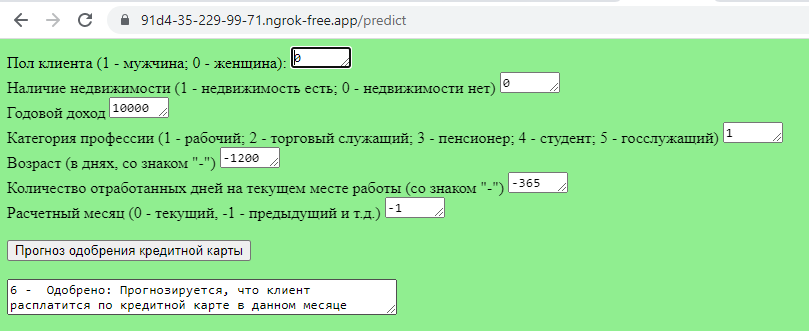

In [ ]:
repl = ['0', ' Одобрено: Прогноз просрочки по кредитной карте в данном месяце составит 1-29 дней.']
s = ''.join(repl)
print(s)
print(f'{repl[0]} {repl[1]}')

0 Одобрено: Прогноз просрочки по кредитной карте в данном месяце составит 1-29 дней.
0  Одобрено: Прогноз просрочки по кредитной карте в данном месяце составит 1-29 дней.


# **Выводы по работе**
Выполнено машинное обучение с учителем методом классификации на основе данных о клиентах банка. Целью классификации является прогнозирование задолженности потенциального клиента по кредитной карте на любом месяце пользования.
Наилучшую точность показала модель, обученная методом k-ближайших соседей: 0,67 (ДР: 0,59, НС: 0,47, МОВ: 0,50).   
Повысить точность можно исключением из рассмотрения записей с параметрами наиболее удаленных от средних значений



In [ ]:
y_0 = np.where(pred == 0)
y_1 = np.where(pred == 1)
y_2 = np.where(pred == 2)
y_3 = np.where(pred == 3)
y_4 = np.where(pred == 4)
y_5 = np.where(pred == 5)
y_6 = np.where(pred == 6)
y_7 = np.where(pred == 7)

In [ ]:
y0 = y_0[0]
y1 = y_1[0]
y2 = y_2[0]
y3 = y_3[0]
y4 = y_4[0]
y5 = y_5[0]
y6 = y_6[0]
y7 = y_7[0]

print([len(y0), len(y1), len(y2), len(y3), len(y4), len(y5), len(y6), len(y7)])
#y_3_indexes = np.searchsorted(pred, 3)
#print(y_3_indexes)

[64881, 405, 16, 10, 5, 257, 68918, 20737]
